In [159]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [160]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data("/kaggle/input/svhndataset/train_32x32.mat")
X_test, y_test = load_data("/kaggle/input/svhndataset/test_32x32.mat")

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [161]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

In [162]:
print("Training Set", X_train.shape)
print("Test Set", X_test.shape)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)


In [163]:
X_train.shape

(73257, 32, 32, 3)

In [164]:
y_train.shape

(73257,)

In [165]:
y_train[0]

1

In [166]:
X_train[0].shape

(32, 32, 3)

In [167]:
img_1 = X_train[0]
X_train[500].shape

(32, 32, 3)

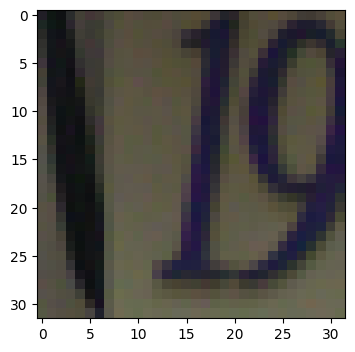

In [168]:
# import matplotlib.pyplot as plt
plt.imshow(img_1)

In [169]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [170]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [171]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [173]:
# 2. Build the MLP Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128,(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(11, activation='softmax')
])
    
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(1012, activation='relu'))   
model.add(Dense(856, activation='relu'))
model.add(Dense(456, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(11, activation='softmax'))

X_train.shape

In [174]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 11)             │         1,419 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1012)           │        12,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 856)            │       867,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 456)            │       390,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 22)             │        10,054 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 11)             │           253 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539,262 (5.87 MB)

 Trainable params: 1,539,262 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

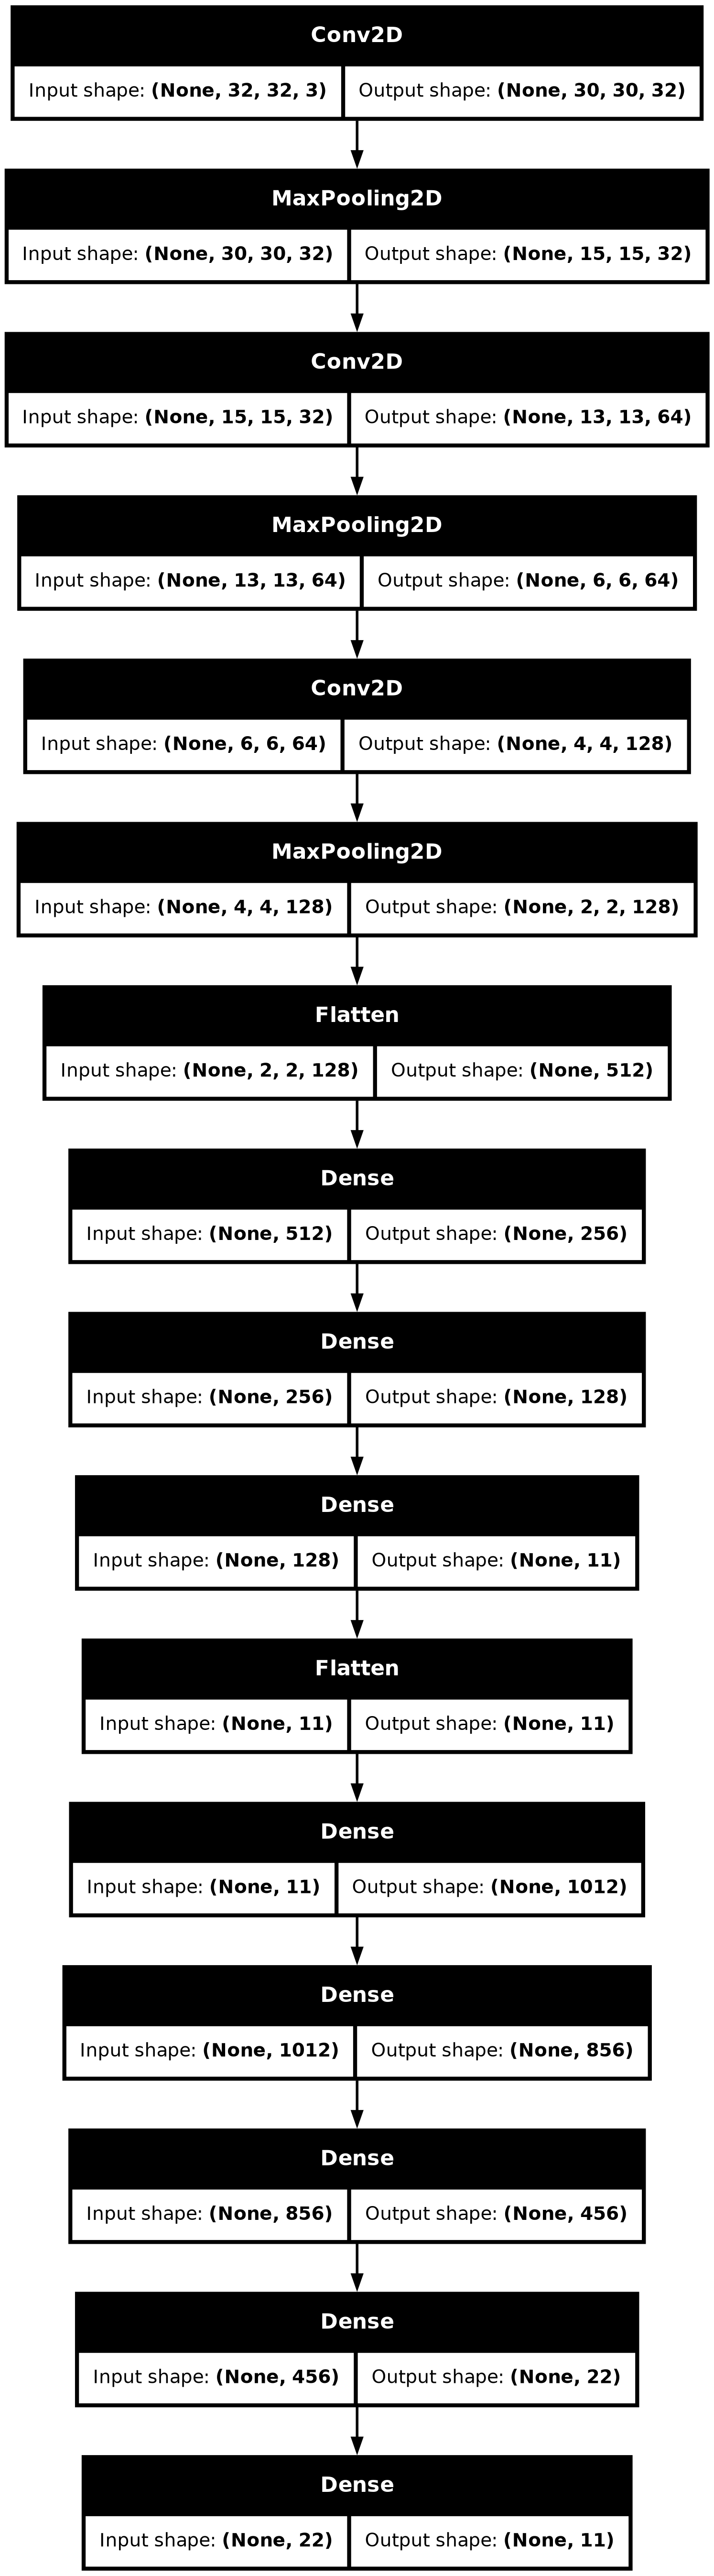

In [175]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [176]:
# 3. Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# tf.keras.optimizers.Adam(learning_rate=0.001)

In [182]:
# 4. Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 74s 65ms/step - accuracy: 0.9061 - loss: 0.3288 - val_accuracy: 0.8851 - val_loss: 0.4376
Epoch 2/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 73s 64ms/step - accuracy: 0.9120 - loss: 0.3096 - val_accuracy: 0.8917 - val_loss: 0.4241
Epoch 3/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.9212 - loss: 0.2784 - val_accuracy: 0.8944 - val_loss: 0.4056
Epoch 4/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 72s 63ms/step - accuracy: 0.9266 - loss: 0.2543 - val_accuracy: 0.8995 - val_loss: 0.3786
Epoch 5/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 71s 62ms/step - accuracy: 0.9319 - loss: 0.2415 - val_accuracy: 0.9024 - val_loss: 0.3752


In [183]:
# PLot the validation and training curvees seperately
def plot_loss_curves(history):
  """
  Returns seperate Loss curves for training and validation metrics
  """
  loss= history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy= history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # PLot Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure() # Create a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

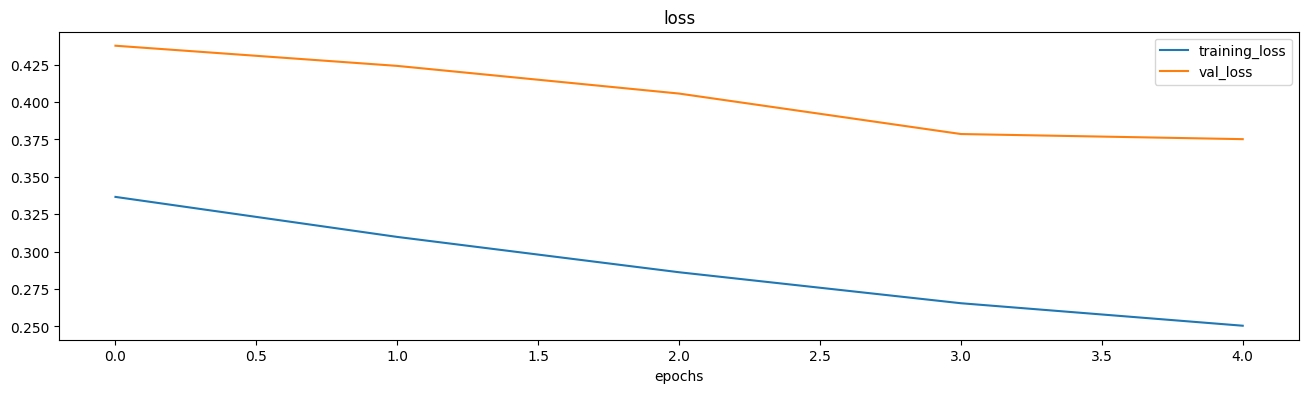

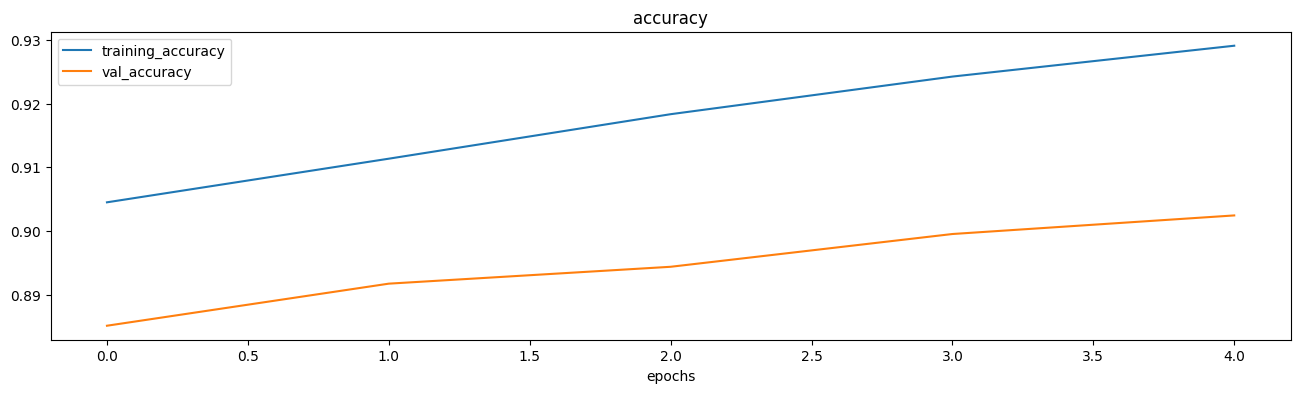

In [184]:
plot_loss_curves(history)

In [185]:
y_test[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


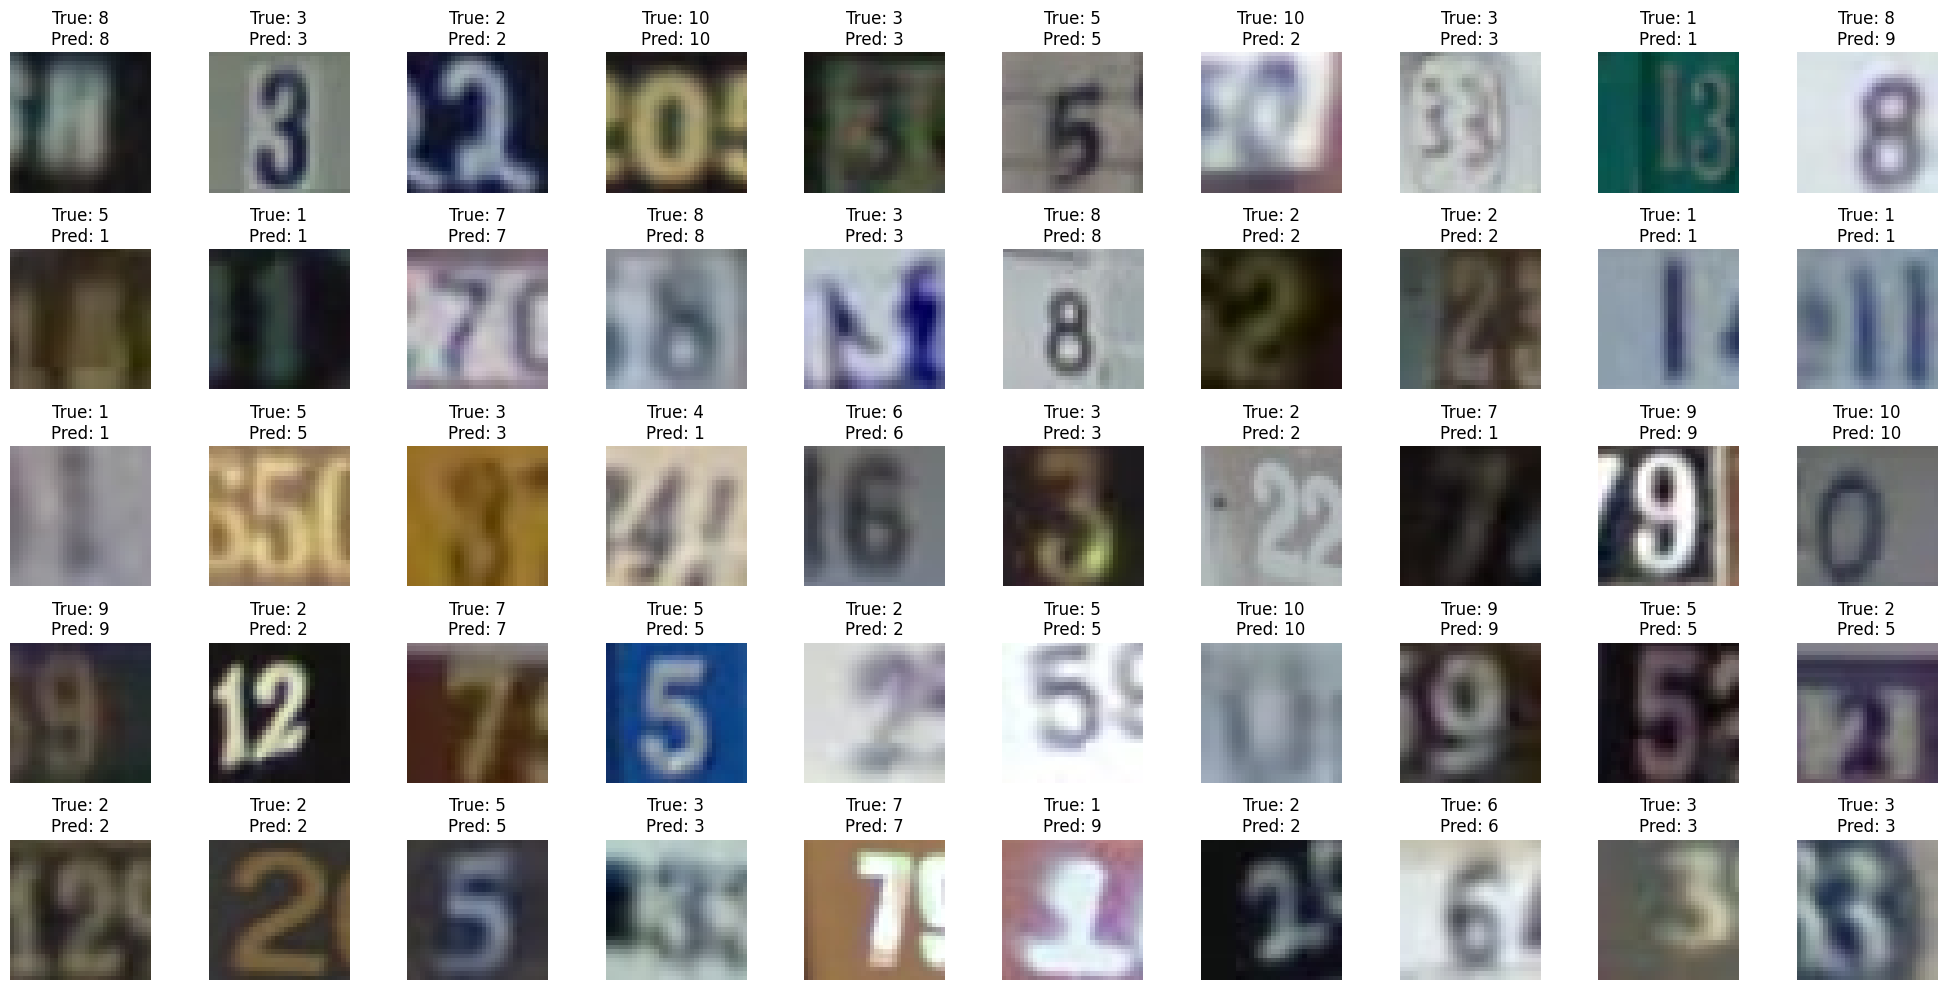

In [186]:
import matplotlib.pyplot as plt

# 1. Select 50 random images from the test set
num_images = 50
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)
test_images = X_test[random_indices]
true_labels = np.argmax(y_test[random_indices], axis=1)

# 2. Predict the labels for these images
predicted_labels = np.argmax(model.predict(test_images), axis=1)

# 3. Plot the images with their predicted and true labels
plt.figure(figsize=(20, 10))
rows = num_images // 10
for i in range(num_images):
    plt.subplot(rows, 10, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()